In [33]:
import requests
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
#Question 
#What are the most common types of crime in different cities and how common each type of crime is? 
#Plan
#To see what area is mentioned the most in the crime data, what was the crime commited (crm cd desc) 
#diffrent intents from the cost data csv as well as how much each one costs (which intent had the most medical cost)

In [5]:
#read the csv file for crime data 
crimeDataDF = pd.read_csv("Crime_Data.csv")
crimeDataDF

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925715,241605270,02/11/2024 12:00:00 AM,02/11/2024 12:00:00 AM,1920,16,Foothill,1681,2,888,TRESPASSING,...,AA,Adult Arrest,888.0,NaN,NaN,NaN,8700 SHARP AV,NaN,34.2278,-118.4051
925716,241604405,01/14/2024 12:00:00 AM,01/13/2024 12:00:00 AM,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,8700 LANKERSHIM BL,NaN,34.2271,-118.3878
925717,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
925718,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054


In [6]:
#read the csv file for cost data 
costDataDF = pd.read_csv("cost_data.csv")
costDataDF

,Mechanism,Intent,Deaths,Medical Costs Total,Medical Costs Average,Value of Statistical Life Total,Value of Statistical Life Average,Combined Costs Total,Combined Costs Average
0,Cut/Pierce,Unintentional,174,2.693588e+06,15480.39,1.454000e+09,8356321.84,1.456694e+09,8371802.23
1,Cut/Pierce,Homicide,1895,1.671351e+07,8819.80,2.132885e+10,11255329.82,2.134556e+10,11264149.61
2,Cut/Pierce,Suicide,965,5.534329e+06,5735.06,9.831300e+09,10187875.65,9.836834e+09,10193610.70
3,Cut/Pierce,Undetermined,42,5.388934e+05,12830.80,4.336000e+08,10323809.52,4.341389e+08,10336640.32
4,Drowning (includes water transport),Unintentional,4677,4.691355e+07,10030.69,5.317013e+10,11368426.34,5.321704e+10,11378457.03
...,...,...,...,...,...,...,...,...,...
62,Unspecified,Suicide,85,3.773226e+05,4439.09,8.853000e+08,10415294.12,8.856773e+08,10419733.21
63,Unspecified,Undetermined,693,1.959715e+07,28278.72,7.305400e+09,10541702.74,7.324997e+09,10569981.46
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#find the data for one of the areas == wilshire
WilshireData = crimeDataDF[crimeDataDF['AREA NAME'] == 'Wilshire']
print(WilshireData)

            DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0       190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130   
18      210705560  11/27/2020 12:00:00 AM  11/27/2020 12:00:00 AM      1800   
20      220705246  02/03/2022 12:00:00 AM  02/11/2020 12:00:00 AM      1200   
58      230711357  06/26/2023 12:00:00 AM  01/01/2020 12:00:00 AM         1   
96      230714162  09/02/2023 12:00:00 AM  08/03/2020 12:00:00 AM      1908   
...           ...                     ...                     ...       ...   
925676  240705258  01/29/2024 12:00:00 AM  01/27/2024 12:00:00 AM      1434   
925678  240706977  03/11/2024 12:00:00 AM  03/08/2024 12:00:00 AM      1540   
925685  240706814  03/07/2024 12:00:00 AM  03/05/2024 12:00:00 AM      1800   
925690  240704851  01/21/2024 12:00:00 AM  01/20/2024 12:00:00 AM      2000   
925710  240700535  01/30/2024 12:00:00 AM  01/29/2024 12:00:00 AM      2330   

        AREA AREA NAME  Rpt Dist No  Part 1-2  Crm 

In [18]:
#find the crime description for wilshire
wilshire_crime_descriptions = WilshireData['Crm Cd Desc'] # Get the 'Crm Cd Desc' column from WilshireData DataFrame
crime_description_table = pd.DataFrame({'Crime Description': wilshire_crime_descriptions}) # Create a DataFrame with the crime descriptions
print(crime_description_table # Display the table


                                        Crime Description
0                                        VEHICLE - STOLEN
18         ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
20      THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...
58                                      THEFT OF IDENTITY
96                                      THEFT OF IDENTITY
...                                                   ...
925676                 THEFT PLAIN - PETTY ($950 & UNDER)
925678                           BATTERY - SIMPLE ASSAULT
925685            LETTERS, LEWD  -  TELEPHONE CALLS, LEWD
925690                                   VEHICLE - STOLEN
925710                   BURGLARY FROM VEHICLE, ATTEMPTED

[44529 rows x 1 columns]


In [37]:
# Count occurrences of each area name
areaCounts = crimeDataDF['AREA NAME'].value_counts()

# Find the area with the highest occurrence
mostCommonArea = areaCounts.idxmax()  # Get index (area name) of the maximum value

# Get the count of occurrences for the most common area
mostCommonAreaCount = areaCounts.max()

# Display the most common area and its count
print(str(mostCommonArea) + (", ") + str(mostCommonAreaCount))

Central, 62852


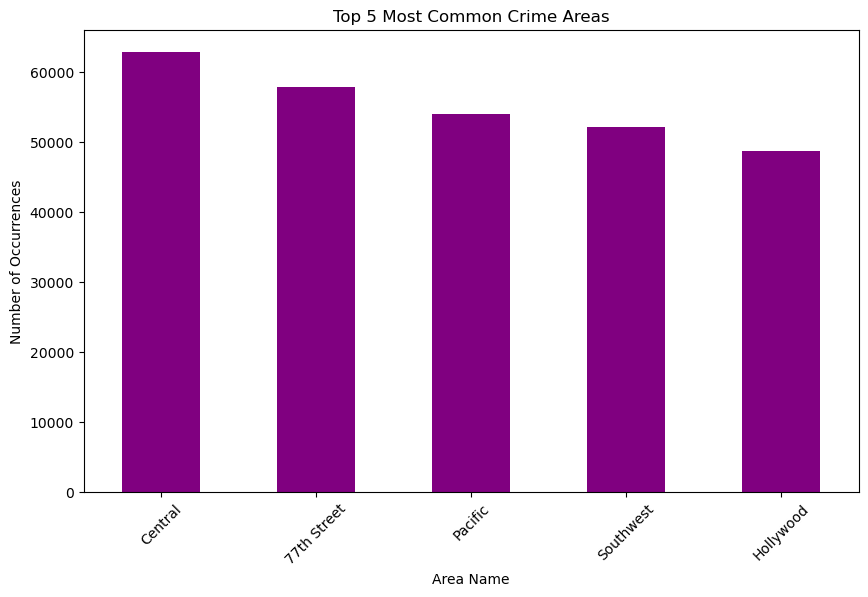

In [55]:
#create a bar graph that shows the most common crime area, top 5 
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)


top_5_areas.plot(kind='bar', color='purple') # Create a bar plot


plt.title('Top 5 Most Common Crime Areas') # Set the title and labels
plt.xlabel('Area Name')
plt.ylabel('Number of Occurrences')


plt.xticks(rotation=45) # Rotate x-axis 



plt.show()


In [41]:
fbiMostWanted = requests.get("https://api.fbi.gov/@wanted?pageSize=20&page=1&sort_on=modified&sort_order=desc").json()
print(fbiMostWanted)

{'total': 989, 'items': [{'dates_of_birth_used': ['August 12, 1967'], 'place_of_birth': 'Texas', 'reward_text': 'The FBI is offering a reward of up to $10,000 for information leading to the location and arrest of Regina Lynn Thomas.', 'poster_classification': 'default', 'uid': '654d75447dbe416caa89ba958b2201b7', 'possible_states': None, 'sex': 'Female', 'details': None, 'scars_and_marks': None, 'images': [{'original': 'https://www.fbi.gov/wanted/wcc/regina-lynn-thomas/@@images/image', 'thumb': 'https://www.fbi.gov/wanted/wcc/regina-lynn-thomas/@@images/image/thumb', 'large': 'https://www.fbi.gov/wanted/wcc/regina-lynn-thomas/@@images/image/large', 'caption': 'Photograph taken in approximately 2010'}, {'original': 'https://www.fbi.gov/wanted/wcc/regina-lynn-thomas/regina-thomas2.png', 'thumb': 'https://www.fbi.gov/wanted/wcc/regina-lynn-thomas/regina-thomas2.png/@@images/image/thumb', 'large': 'https://www.fbi.gov/wanted/wcc/regina-lynn-thomas/regina-thomas2.png/@@images/image/large', '

In [44]:
data = fbiMostWanted['items']
counter = 0
for i in data:
    title = data[counter]['title']
    #race = data[counter]['race']
    #weight = data[counter]['weight']
    description = data[counter]['description']
    #hair = data[counter]['hair']
    #field_offices = data[counter]['field_offices']
    #details = data[counter]['details']
    counter +=1

    # Display the information for each wanted person
    print(title)
    #print(race)
    #print(weight)
    print(description)
    #print(hair)
    #print(field_offices)
    #print(details)
    print("\n")

REGINA LYNN THOMAS
Conspiracy to Commit Wire Fraud; Wire Fraud


RUSSELL JOSEPH DERMOND AND SHIRLEY WILCOX DERMOND
May 6, 2014
Eatonton, Georgia


BORIS YAKOVLEVICH LIVSHITS
Conspiracy to Defraud the United States; Conspiracy to Violate the International Emergency Economic Powers Act (IEEPA); Bank Fraud Conspiracy; Wire Fraud Conspiracy; Wire Fraud; Money Laundering Conspiracy; Money Laundering; Conspiracy to Violate the Export Control Reform Act (ECRA); Smuggling Goods from the United States; Failure to File Electronic Export Information


JESUS DE LA CRUZ - LYNN, MASSACHUSETTS
September 28, 1996
Lynn, Massachusetts


IDA DEAN (RICHARDSON) ANDERSON - ANN ARBOR, MICHIGAN
September 18, 1958
Ann Arbor, Michigan


AARON PAUL VICTORY
Escape; Felon in Possession of  Firearm and Ammunition; Possession of a Stolen Firearm


JAMES ARTHUR MCDONALD, JR.
Securities Fraud


HUYEN TRANG TEMPLE - ARSON
New Caney, Texas
November 5, 2023


BRYAN MATTHEW MCGEHRIN - TANEYTOWN, MARYLAND
October 25, 2019


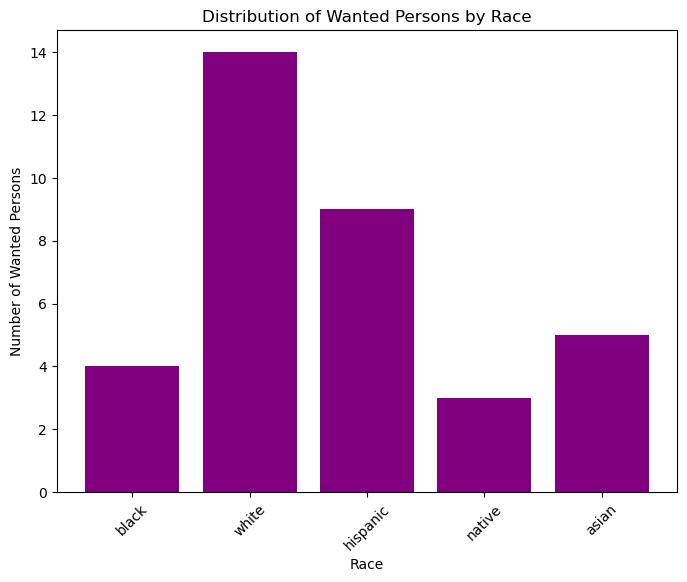

In [49]:
#Another question popped up when I was doing my research, what is qualities of most wanted persons, race had more opputunity to give actual data 
x_values = list(race_counts.keys()) # Convert dictionary keys and values to lists for plotting
y_values = list(race_counts.values())

# Plotting bar chart
plt.figure(figsize=(8, 6))
plt.bar(x_values, y_values, color='purple')
plt.xlabel('Race')
plt.ylabel('Number of Wanted Persons')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Distribution of Wanted Persons by Race')
plt.show()


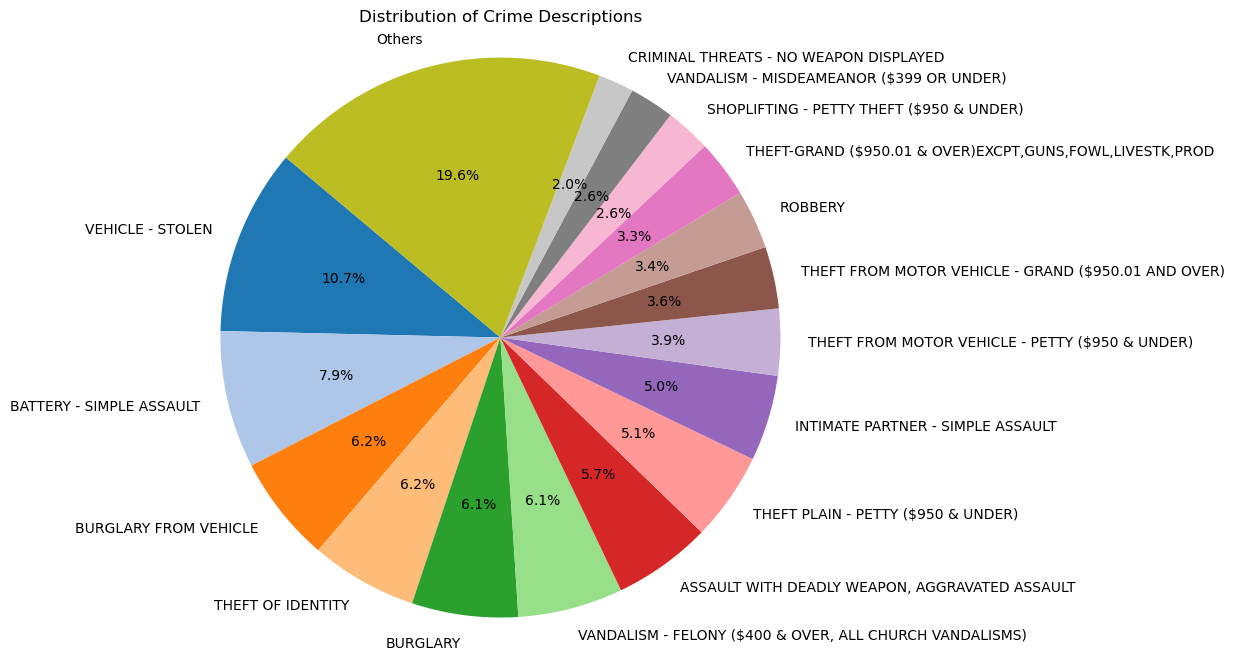

In [54]:
#Finding 
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'crime_data.csv'
crime_data = pd.read_csv(file_path)

crime_counts = crime_data['Crm Cd Desc'].value_counts()

total_crimes = crime_counts.sum()
crime_percentages = (crime_counts / total_crimes) * 100

threshold = 2  # Categories with less than 10% will be grouped into 'Others'

small_categories = crime_percentages[crime_percentages < threshold]

crime_counts['Others'] = crime_counts[small_categories.index].sum()
crime_counts.drop(small_categories.index, inplace=True)

plt.figure(figsize=(10, 8))  # Set the figure size (width, height)
colors = plt.cm.tab20.colors  # Choose a color palette for the pie chart

plt.pie(crime_counts, labels=crime_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Crime Descriptions')  # Set the title of the pie chart
plt.axis('equal')  # Ensure the pie chart is drawn as a circle
plt.show()
